cos'è 
prendiamo la matrice dei dati X e la raggruppiamo in k gruppi
dove k può essere più o meno noto, nel secondo caso dobbiamo capirlo dai dati

è una tecnica non supervisionata
tra gli elementi di un gruppo ci sono alcuni che condividno delle proprietà che per noi sono sconosciute.

per farlo dobbiamo capire cosa è simile e cosa è diverso: il clustering è soggettivo e dipende dal contesto
definiamo una funzione distanza

##### clustering gerarchico

*dendogramma* più le unioni avvengono in basso più sono simili, più le unioni sono 'alte' più sono diverse

bisogna capire non solo come calcolare la distanza tra due elementi, ma tra un elemento e un gruppo e anche tra due gruppi -> linkage functions

in ambito biomedico si applica sui microarray

un algoritmo di clustering troverà sempre delle partizioni, ma queste partizioni richiedono una valutazione a posteriori sulla bontà delle partizioni individuate


##### clustering partitivo
tipo il k-means
è una procedura di ottimizzazione

scelta del numero dei cluster:
una regola empirica è: prova e poi vedi se i cluster trovati vanno bene

maledizione della dimensionalità:
se la dimensione di un oggetto cresce, tutti i metodi a un certo punto collassano



### clustering gerarchico

In [27]:

library("cluster")
data(iris)
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [28]:
iris_measures = iris[,1:4]
iris_species = iris[,5]

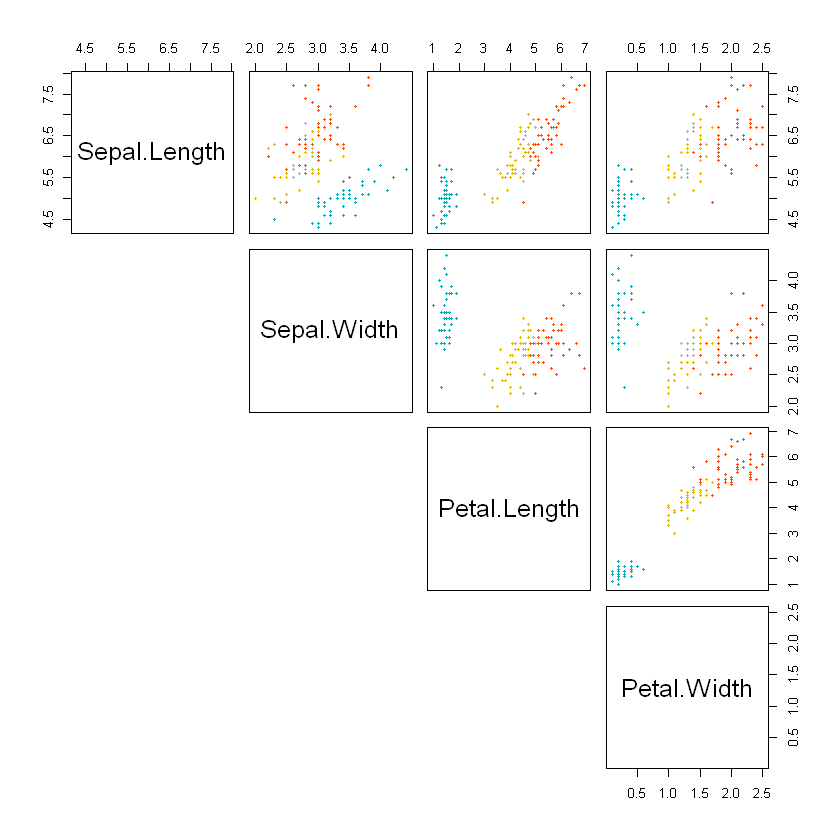

In [29]:
my_cols <- c("#00AFBB", "#E7B800","#FC4E07")
##pairs  accoppia le dimensioni a due a due
pairs(iris_measures, pch = 19, cex = 0.5, col = my_cols[iris_species], lower.panel=NULL)

In [30]:
##riprovare usando la funzione scale()

D = dist(iris_measures) ##di default è la distanza euclidea

In [31]:
Clust = hclust(D)

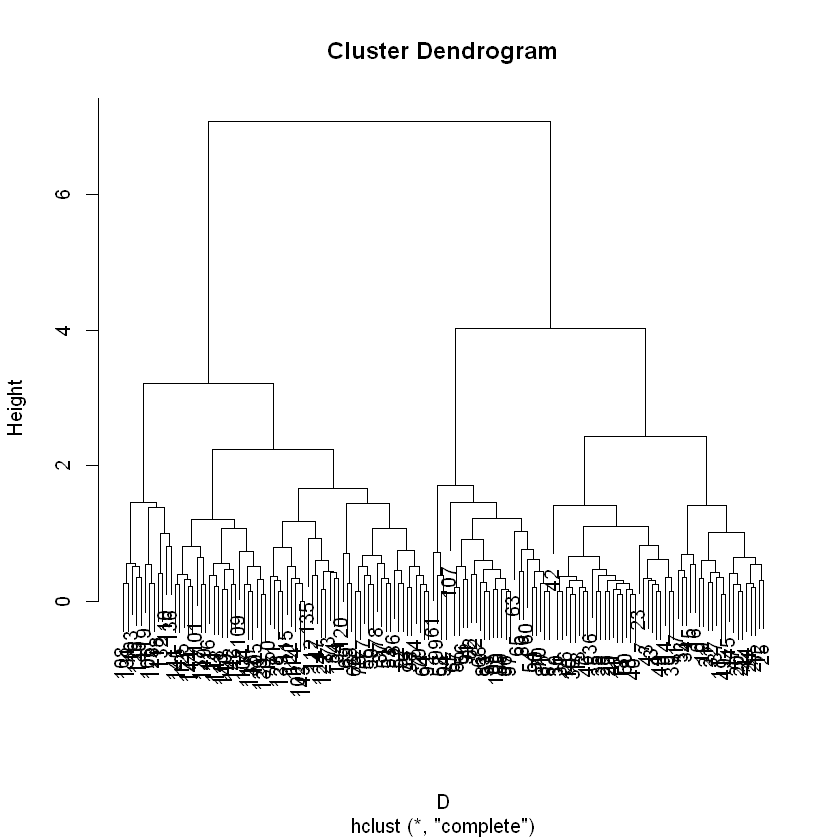

In [32]:
plot(Clust)

In [33]:
labels = cutree(Clust, k = 3) ##se passo h invece taglio in base all'altezza
labels

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 3 2 3 3 3 3 2 3 2 3 3 2 3 2 3 2 2
 [75] 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 2 3 3 3 3 3 2 3 3 2 2 2 2 2 2 3 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2

In [34]:
table(labels)

labels
 1  2  3 
50 72 28 

In [35]:
table(data.frame(labels, iris_species)) #confrontiamo il vettore dei cluster con il vettore delle specie

      iris_species
labels setosa versicolor virginica
     1     50          0         0
     2      0         23        49
     3      0         27         1

Se rivvediamo gli scatter plot vediamo che la setosa (blu) è molto separata dagli altri due cluster mentre gli altri due sono un po' misti ed effettivamente o vediamo nei cluster

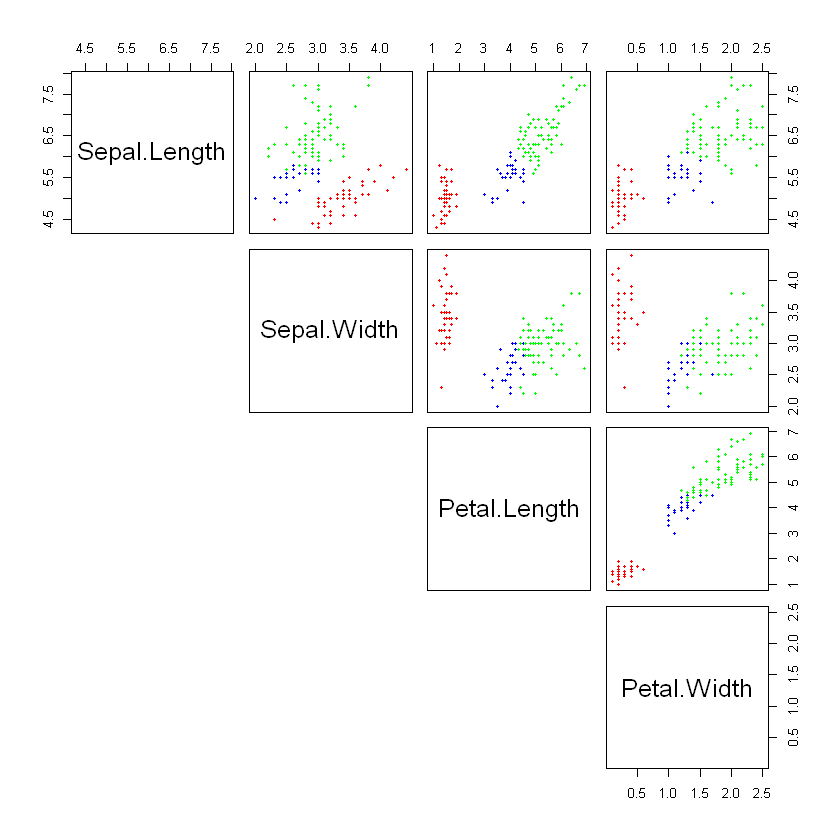

In [36]:
my_cols <- c("red", "green","blue")
##pairs  accoppia le dimensioni a due a due
pairs(iris_measures, pch = 19, cex = 0.5, col = my_cols[labels], lower.panel=NULL)

###  k-means

In [51]:
kmeans = kmeans(iris_measures, centers=3)

In [52]:
labelsK = kmeans$cluster
kmeans$centers

Sepal.Length Sepal.Width Petal.Length Petal.Width
1 6.850000     3.073684    5.742105     2.071053   
2 5.006000     3.428000    1.462000     0.246000   
3 5.901613     2.748387    4.393548     1.433871

In [53]:
kmeans$size

[1] 38 50 62

In [54]:
table(data.frame(labelsK, iris_species))

       iris_species
labelsK setosa versicolor virginica
      1      0          2        36
      2     50          0         0
      3      0         48        14

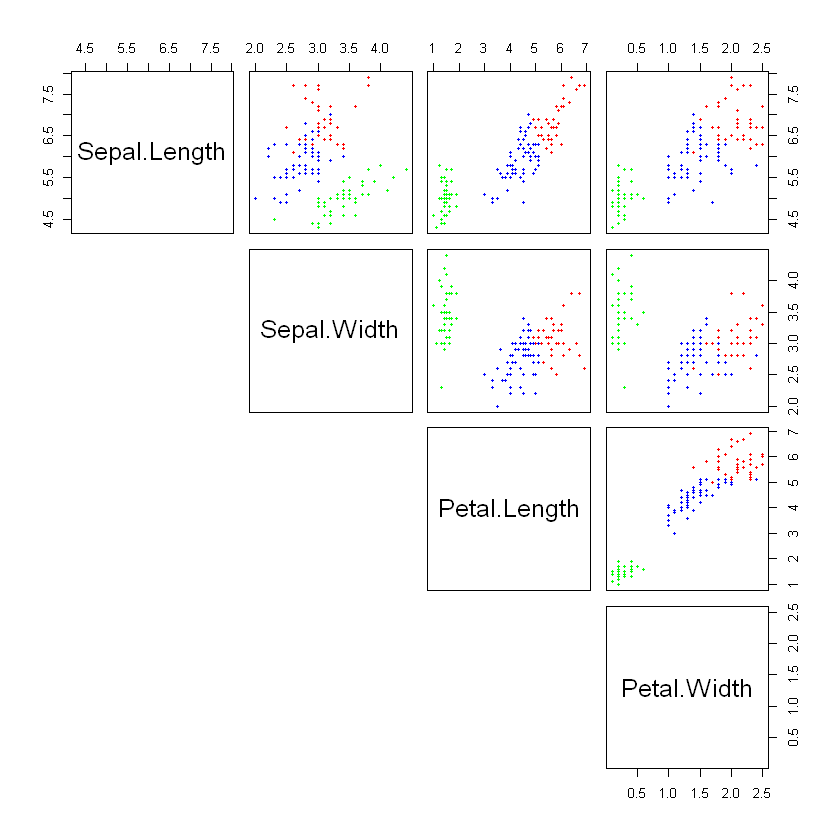

In [55]:
my_cols <- c("red", "green","blue")
##pairs  accoppia le dimensioni a due a due
pairs(iris_measures, pch = 19, cex = 0.5, col = my_cols[labelsK], lower.panel=NULL)

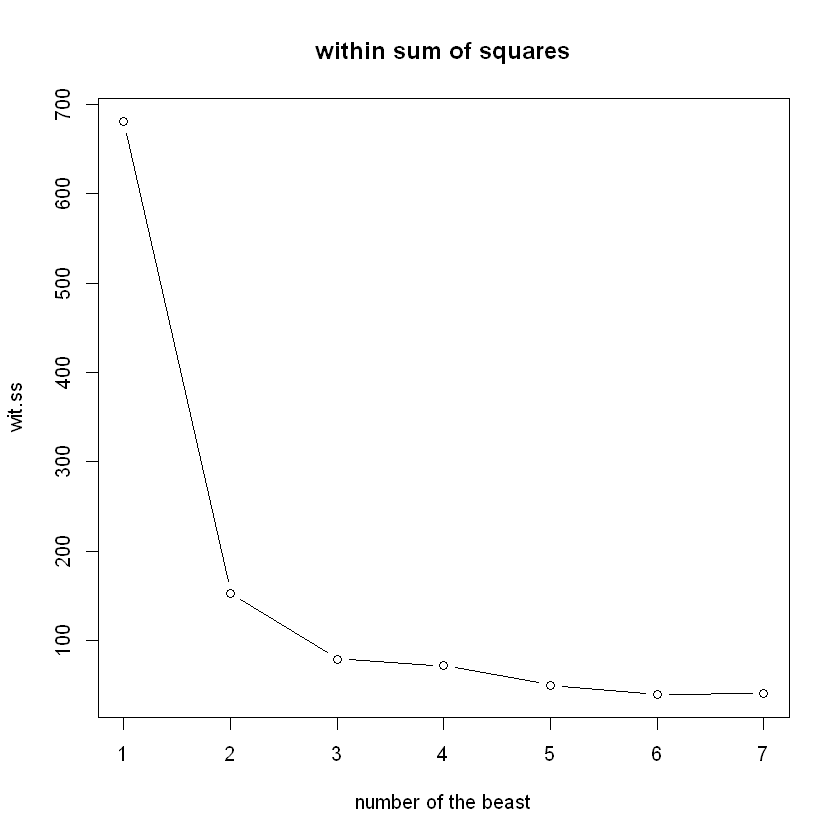

In [63]:
kmax = 7
wit.ss = NULL
for (iclust in seq(1,kmax)) {
    wdum = kmeans(iris_measures, centers=iclust)$tot.withinss
    wit.ss[iclust] = wdum
}
plot(1:kmax,wit.ss,main= "within sum of squares", xlab= "number of the beast", type = "b")


### pam

In [58]:
pam = pam(iris_measures, k = 3)
pam

Medoids:
      ID Sepal.Length Sepal.Width Petal.Length Petal.Width
[1,]   8          5.0         3.4          1.5         0.2
[2,]  79          6.0         2.9          4.5         1.5
[3,] 113          6.8         3.0          5.5         2.1
Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2
Objective function:
    build      swap 
0.6709391 0.6542077 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      

In [64]:
labelsp = pam$clustering

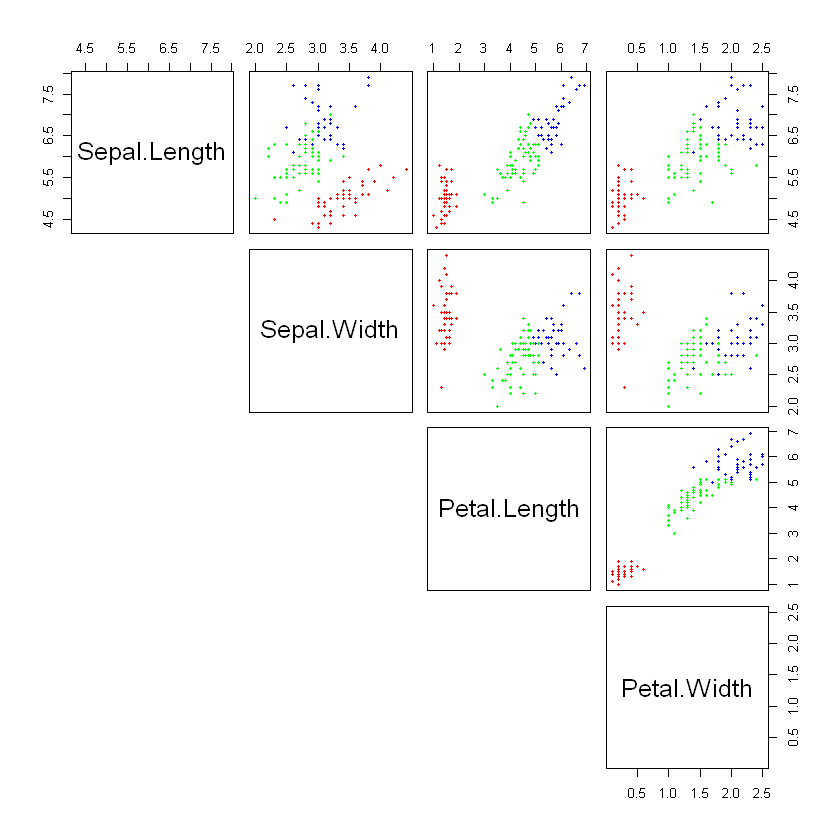

In [65]:
my_cols <- c("red", "green","blue")
##pairs  accoppia le dimensioni a due a due
pairs(iris_measures, pch = 19, cex = 0.5, col = my_cols[labelsp], lower.panel=NULL)

### silhouette plot

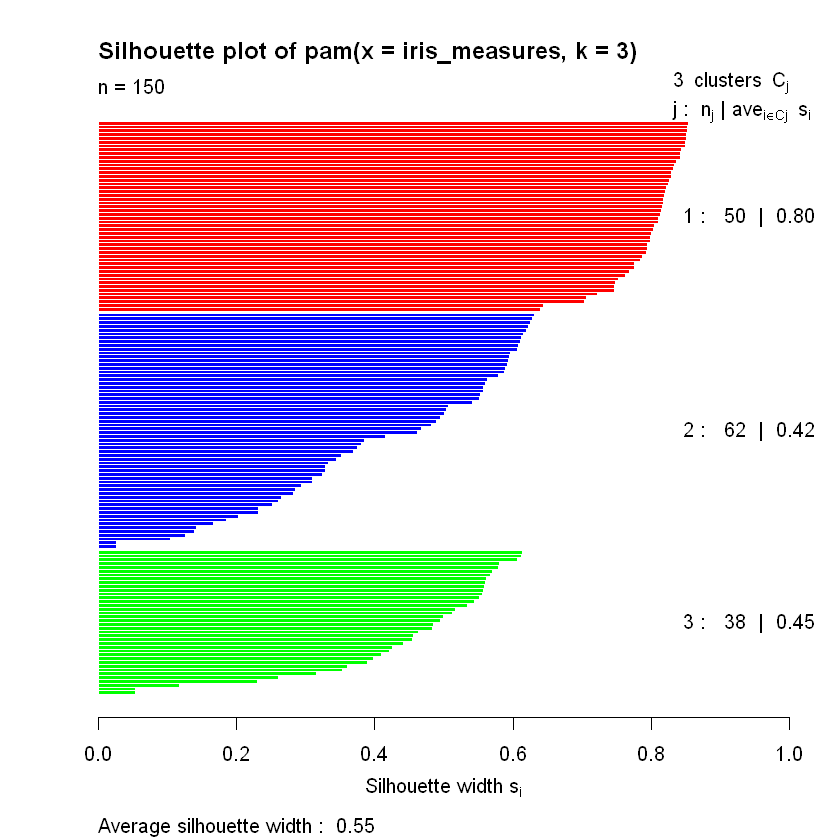

In [66]:
sil = silhouette(pam)
plot(sil,col = c("red", "blue", "green"))

il valore per ogni riga dopo la barretta | indicano l'indice di clusterizzazione:
vvalori vicino a 1 indicano una buona clusterizzazione, valori vicino allo zero indicano una cattiva clusterizzazione

### esempio biomedico

In [82]:
library(ISLR)
nci.labs=NCI60$labs
nci.data=NCI60$data
dim(nci.data)
table(nci.labs)

[1]   64 6830

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

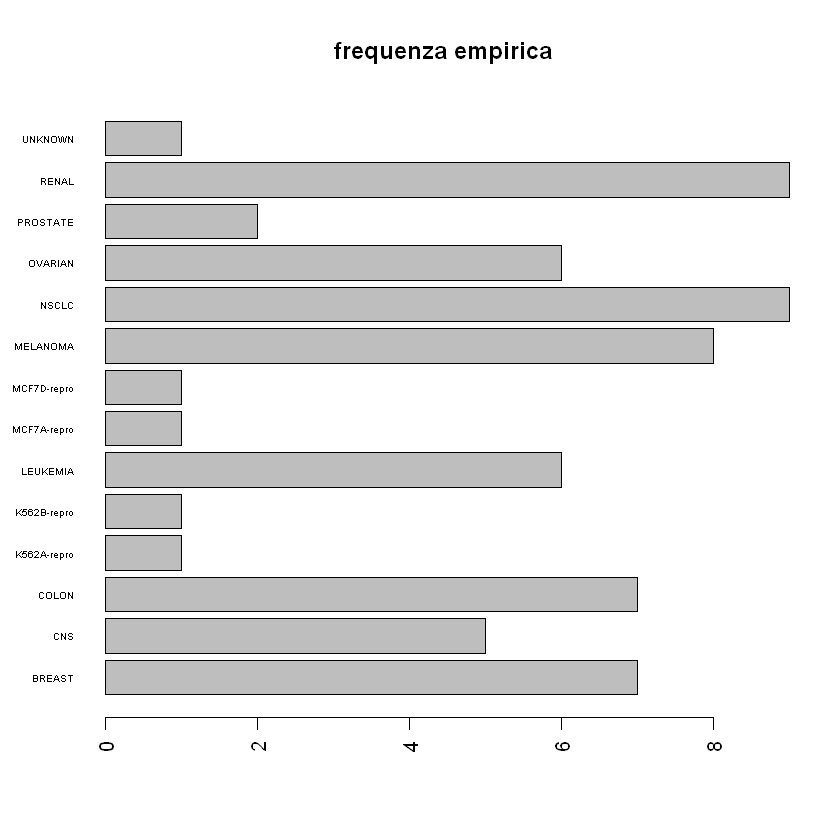

In [88]:
barplot(table(nci.labs), main = "frequenza empirica", cex.names = 0.5, horiz = TRUE,las=2)

In [94]:
scaled = scale(nci.data) ##scalo i dati (normalizzo)

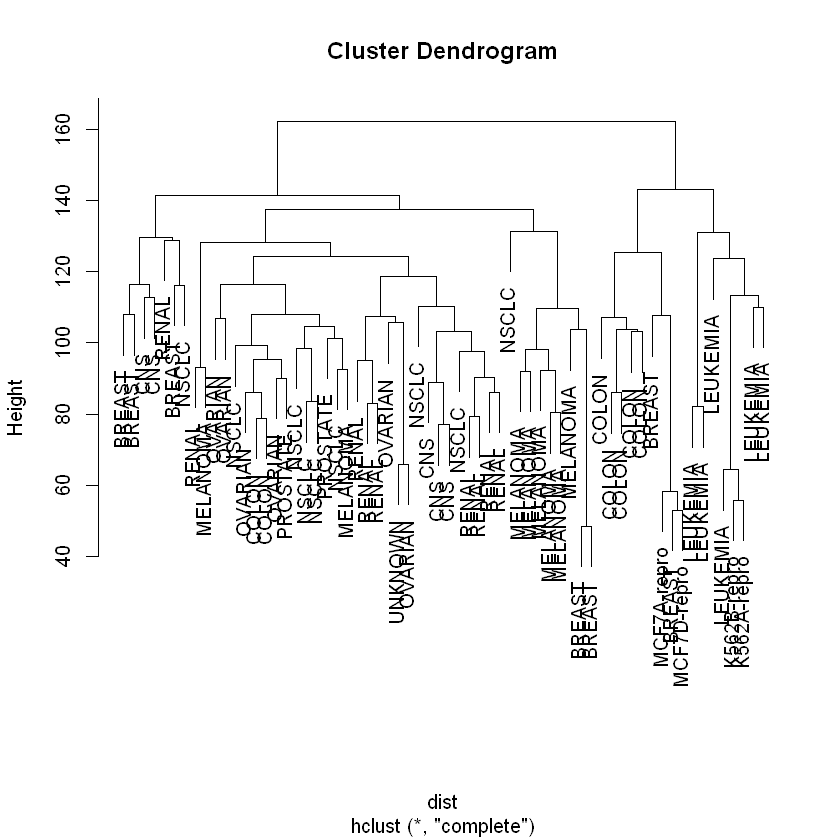

In [95]:
dist = dist(scaled)
bioclust = hclust(dist)
plot(bioclust, labels = nci.labs)

In [96]:
biolabels = cutree(bioclust, k = 3) ##se passo h invece taglio in base all'altezza
table(biolabels)

biolabels
 1  2  3 
47  8  9 

In [97]:
table(data.frame(biolabels, nci.labs))

         nci.labs
biolabels BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
        1      5   5     2           0           0        0           0
        2      0   0     0           1           1        6           0
        3      2   0     5           0           0        0           1
         nci.labs
biolabels MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
        1           0        8     9       6        2     9       1
        2           0        0     0       0        0     0       0
        3           1        0     0       0        0     0       0